### Data processing for RNN
1. Impact of sequential data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
#from sklearn.model_selection import

In [ ]:
# prompt: extrac financial-data.zip

!unzip financial-data.zip


Archive:  financial-data.zip
replace financial-data/COP.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
path = ("financial-data/{}.csv")
name = {"TOT": "Total", "XOM": "Exxcon", "CVX": "Chevron", "COP": "ConocoPhillips", "VLO": "Valero"}
prices = {}
for n in name:
  data = pd. read_csv(path.format(n), index_col=0, parse_dates=True)
  #data.rename(columns={"Adj Close": name[n]}, inplace=True)
  prices[name[n]] = data["open"]

In [ ]:
prices = pd.DataFrame(prices)
print(prices.head())

            Total  Exxcon  Chevron  ConocoPhillips  Valero
date                                                      
2003-01-02  71.62   35.00    67.20           48.80   37.04
2003-01-03  72.12   35.25    67.82           49.53   38.13
2003-01-06  72.93   35.45    68.34           49.50   37.37
2003-01-07  72.40   36.05    69.75           49.85   37.46
2003-01-08  69.51   35.15    68.46           48.44   36.51


<Axes: xlabel='date'>

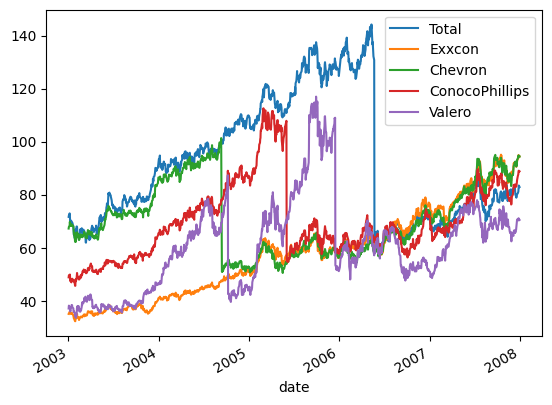

In [ ]:
prices.plot()

In [ ]:
data, target = prices.drop(columns= ["Chevron"]), prices["Chevron"]

data_train, data_test, target_train, target_test = train_test_split(data, target,
                                                                    test_size=0.2,
                                                                    shuffle=True,
                                                                    random_state= 123)

In [ ]:
rg = DecisionTreeRegressor()
rg.fit(data_train, target_train)
y_pred = rg.predict(data_test)
print(y_pred[:5])

[57.98 93.   58.94 55.53 86.79]


In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(target_test, y_pred))

1.1292063492063495


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(target_test, y_pred))

0.9329796274677725


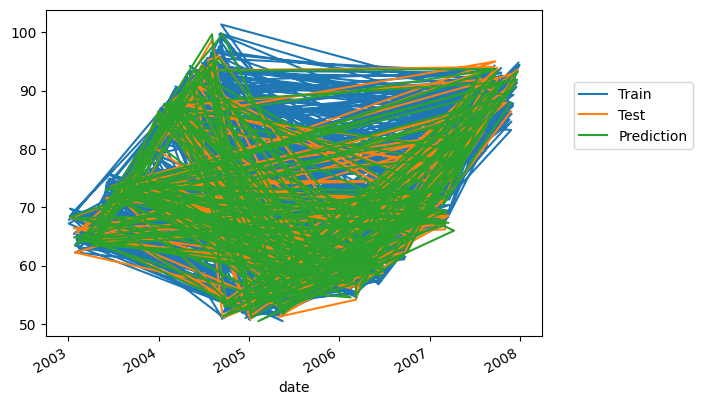

In [ ]:
target_train.plot(label = "Train")
target_test.plot(label = "Test")

y_pred = pd.Series(y_pred, index=target_test.index)
y_pred.plot(label = "Prediction")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc = "upper left")

In [ ]:

data_train, data_test, target_train, target_test = train_test_split(data, target,
                                                                    test_size=0.2,
                                                                    shuffle=False,
                                                                    random_state= 123)

In [ ]:
rg = DecisionTreeRegressor()
rg.fit(data_train, target_train)
y_pred = rg.predict(data_test)
print(y_pred[:5])

[73.28 74.26 72.33 68.91 72.64]


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(target_test, y_pred))

-0.5465548717441919


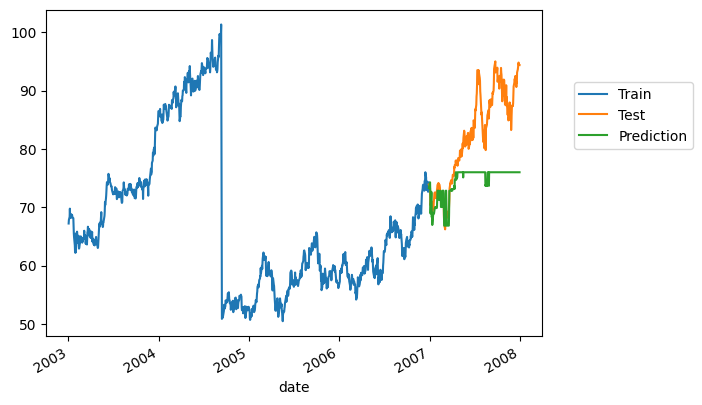

In [ ]:
target_train.plot(label = "Train")
target_test.plot(label = "Test")

y_pred = pd.Series(y_pred, index=target_test.index)
y_pred.plot(label = "Prediction")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc = "upper left")

2. Time-series data

               value
date                
1991-07-01  3.526591
1991-08-01  3.180891
1991-09-01  3.252221
1991-10-01  3.611003
1991-11-01  3.565869


<Axes: xlabel='date'>

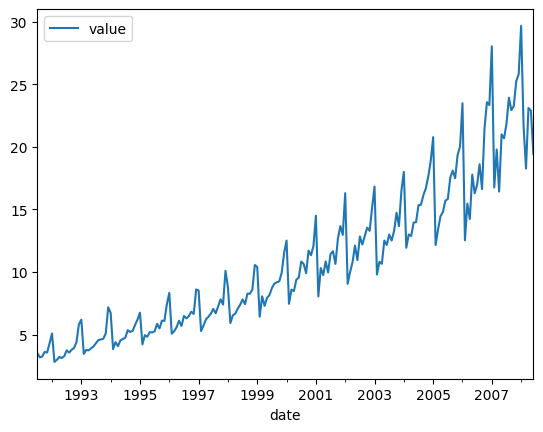

In [ ]:
data = pd.read_csv("a10.csv", parse_dates=["date"], index_col=0)
print(data.head())
data.plot()

**trend**          
**seasonality**     
**cyclic**            

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

print(data.dtypes)



value    float64
dtype: object


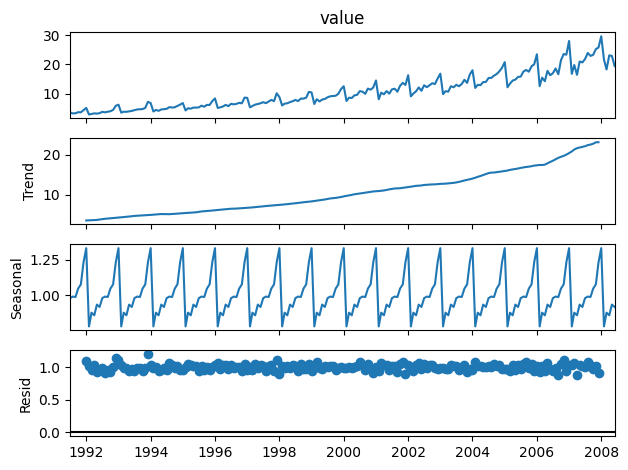

In [ ]:
decomp = seasonal_decompose(data["value"], model = "multiplicative")
_ = decomp.plot()

3. Time-series imputation

In [ ]:
data = pd.read_csv("a10_imputation.csv", parse_dates=["date"], index_col="date")
print(data.head())

               value
date                
1991-07-01  3.526591
1991-08-01       NaN
1991-09-01  3.252221
1991-10-01  3.611003
1991-11-01  3.565869


In [ ]:
data_missing_index = data[data.isnull().any(axis = 1)].index
print(data_missing_index)

DatetimeIndex(['1991-08-01'], dtype='datetime64[ns]', name='date', freq=None)


In [ ]:
print(data[:5])
dataf = data.ffill()
print(dataf[:5])

               value
date                
1991-07-01  3.526591
1991-08-01       NaN
1991-09-01  3.252221
1991-10-01  3.611003
1991-11-01  3.565869
               value
date                
1991-07-01  3.526591
1991-08-01  3.526591
1991-09-01  3.252221
1991-10-01  3.611003
1991-11-01  3.565869


In [ ]:
print(data[:5])
datab = data.bfill()
print(datab[:5])

               value
date                
1991-07-01  3.526591
1991-08-01       NaN
1991-09-01  3.252221
1991-10-01  3.611003
1991-11-01  3.565869
               value
date                
1991-07-01  3.526591
1991-08-01  3.252221
1991-09-01  3.252221
1991-10-01  3.611003
1991-11-01  3.565869


In [ ]:
from scipy.interpolate import interp1d

data["rownum"] = np.array(data.shape[0])
data_nona = data.dropna(subset = ['value'])

f = interp1d(data_nona['rownum'],
             data_nona['value'])

data['linear'] = f(data['rownum'])

print(data[:5])

               value  rownum    linear
date                                  
1991-07-01  3.526591     204  19.43174
1991-08-01       NaN     204  19.43174
1991-09-01  3.252221     204  19.43174
1991-10-01  3.611003     204  19.43174
1991-11-01  3.565869     204  19.43174


4. Text data

Lấy ví dụ dữ liệu text đơn giản cho Tfidf Vectorize

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ['I enjoy programming, programming is interesting']
vec_tfidf = TfidfVectorizer(smooth_idf=True, sublinear_tf=True)
x = vec_tfidf.fit_transform(corpus)
print(vec_tfidf.get_feature_names_out())
print(x.toarray())


['enjoy' 'interesting' 'is' 'programming']
[[0.41285857 0.41285857 0.41285857 0.69903033]]
